In [1]:
import kagglehub
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
#Get data
main_dir = "/Users/khushi/Desktop/MYO"

In [3]:
#Concatenate
all_data = []

In [4]:
for subfolder in os.listdir(main_dir):
    subfolder_path = os.path.join(main_dir, subfolder)

    
    if os.path.isdir(subfolder_path):
        subfolder_data = []

       
        for file in os.listdir(subfolder_path):
            if file.endswith(".csv"):
                file_path = os.path.join(subfolder_path, file)
                
                
                df = pd.read_csv(file_path)
                subfolder_data.append(df)

        
        if subfolder_data:
            merged_df = pd.concat(subfolder_data, ignore_index=True)
            merged_df["class"] = subfolder  
            
            all_data.append(merged_df)



In [5]:
final_df = pd.concat(all_data, ignore_index=True)

In [6]:
final_df.to_csv("merged_output.csv", index=False)

In [7]:
final_df

,Device ID,Warm?,Sync,Arm,Timestamp,Orientation_W,Orientation_X,Orientation_Y,Orientation_Z,Acc_X,...,EMG_5,EMG_6,EMG_7,EMG_8,Locked,RSSI,Roll,Pitch,Yaw,class
0,1451957706736,cold,True,left,2025-02-21 10:00:28 048647,0.626404,0.074646,-0.279480,-0.723877,0.398926,...,1,-3,-1,4,False,0,0.539140,-0.244494,-1.782839,right
1,1451957706736,cold,True,left,2025-02-21 10:00:28 048647,0.626404,0.074646,-0.279480,-0.723877,0.398926,...,4,0,-1,3,False,0,0.539140,-0.244494,-1.782839,right
2,1451957706736,cold,True,left,2025-02-21 10:00:28 049640,0.626404,0.074646,-0.279480,-0.723877,0.398926,...,-2,2,-2,-4,False,0,0.539140,-0.244494,-1.782839,right
3,1451957706736,cold,True,left,2025-02-21 10:00:28 049640,0.626404,0.074646,-0.279480,-0.723877,0.398926,...,3,-4,1,2,False,0,0.539140,-0.244494,-1.782839,right
4,1451957706736,cold,True,left,2025-02-21 10:00:28 053635,0.626404,0.074646,-0.279480,-0.723877,0.398926,...,-3,-1,1,-1,False,0,0.539140,-0.244494,-1.782839,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14867,1610419409776,cold,True,left,2025-02-21 10:07:25 286715,0.649475,0.343811,-0.341309,-0.586121,0.033691,...,25,15,2,6,False,0,1.010989,-0.040324,-1.490707,five
14868,1610419409776,cold,True,left,2025-02-21 10:07:25 299815,0.649475,0.343811,-0.341309,-0.586121,0.033691,...,-25,-9,-5,4,False,0,1.010989,-0.040324,-1.490707,five
14869,1610419409776,cold,True,left,2025-02-21 10:07:25 300728,0.649475,0.343811,-0.341309,-0.586121,0.033691,...,-30,-14,-2,-8,False,0,1.010989,-0.040324,-1.490707,five
14870,1610419409776,cold,True,left,2025-02-21 10:07:25 301724,0.649475,0.343811,-0.341309,-0.586121,0.035645,...,31,5,4,12,False,0,1.010989,-0.040324,-1.490707,five


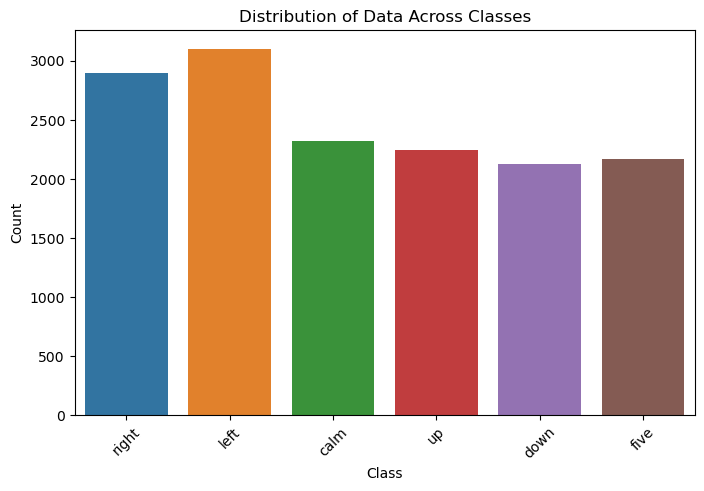

In [10]:
#Label Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=final_df)
plt.title("Distribution of Data Across Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


/var/folders/j1/2d31w8mj36dcmbgr8l2lptp40000gn/T/ipykernel_15842/2338081514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_df.corr()


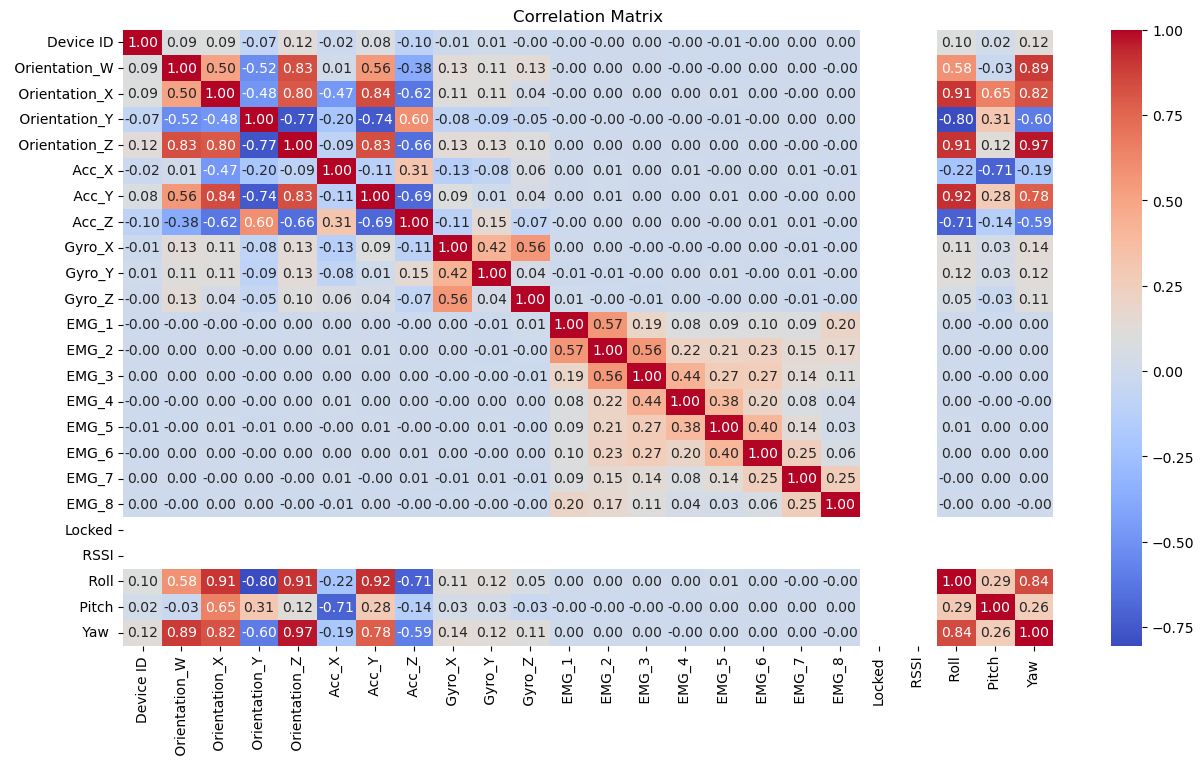

In [16]:
#Correlation matrix
correlation_matrix = final_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [17]:
final_df.describe()

,Device ID,Orientation_W,Orientation_X,Orientation_Y,Orientation_Z,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,...,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,RSSI,Roll,Pitch,Yaw
count,1.487200e+04,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,...,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.0,14872.000000,14872.000000,14872.000000
mean,2.181787e+12,0.629808,0.175722,-0.249976,-0.694382,0.068380,0.499657,0.674613,-0.581706,2.076074,...,-0.829882,-0.489914,-0.143962,-0.580621,-0.567173,-0.582773,0.0,0.629184,-0.090663,-1.687295
std,4.360074e+11,0.044016,0.120523,0.071224,0.079268,0.168189,0.201785,0.156086,28.273676,12.600746,...,10.979926,24.118265,30.735672,15.023227,16.512041,15.115942,0.0,0.240262,0.136137,0.175794
min,1.276495e+12,0.488403,-0.064575,-0.386292,-0.859985,-0.754395,-0.293457,-0.153809,-292.687500,-118.500000,...,-127.000000,-128.000000,-128.000000,-122.000000,-122.000000,-128.000000,0.0,0.056693,-0.381329,-2.102888
25%,1.891910e+12,0.603333,0.057709,-0.291687,-0.740112,-0.002441,0.377441,0.597168,-2.562500,-1.312500,...,-4.000000,-8.000000,-12.000000,-5.000000,-4.000000,-3.000000,0.0,0.478219,-0.133588,-1.800302
50%,2.186249e+12,0.639587,0.173767,-0.272400,-0.712219,0.045166,0.491699,0.714355,-0.125000,0.312500,...,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,0.600600,-0.058928,-1.725560
75%,2.491015e+12,0.658875,0.281189,-0.192566,-0.618652,0.126465,0.658203,0.744629,2.187500,2.390625,...,2.000000,7.000000,12.000000,4.000000,3.000000,2.000000,0.0,0.827888,-0.018359,-1.522909
max,3.083341e+12,0.730652,0.409729,-0.060181,-0.532593,0.936523,1.449707,1.489258,187.562500,110.375000,...,115.000000,127.000000,127.000000,119.000000,126.000000,127.000000,0.0,1.167407,0.171181,-1.320296


In [18]:
print(final_df['class'].value_counts())

left     3104
right    2898
calm     2324
up       2250
five     2168
down     2128
Name: class, dtype: int64


In [19]:
print(final_df.columns)


Index(['Device ID', ' Warm?', ' Sync', ' Arm', ' Timestamp', ' Orientation_W',
       ' Orientation_X', ' Orientation_Y', ' Orientation_Z', ' Acc_X',
       ' Acc_Y', ' Acc_Z', ' Gyro_X', ' Gyro_Y', ' Gyro_Z', ' Pose', ' EMG_1',
       ' EMG_2', ' EMG_3', ' EMG_4', ' EMG_5', ' EMG_6', ' EMG_7', ' EMG_8',
       'Locked', ' RSSI', ' Roll', ' Pitch', ' Yaw ', 'class'],
      dtype='object')


In [20]:
final_df.columns = final_df.columns.str.strip()

# Columns to keep
cols = ["EMG_1", "EMG_2", "EMG_3", "EMG_4", "EMG_5", "EMG_6", "EMG_7", "EMG_8"]

# Valid columns needed
val = [col for col in cols if col in final_df.columns]

# Add 'class' 
val.append("class")

# Now select the valid columns
final_df = final_df[val]

# Print the updated columns
print(final_df.columns)


Index(['EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_7', 'EMG_8',
       'class'],
      dtype='object')


In [21]:
final_df

,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,class
0,-8,-10,-11,-3,1,-3,-1,4,right
1,5,-2,-2,-1,4,0,-1,3,right
2,8,14,6,-2,-2,2,-2,-4,right
3,-5,-6,-3,0,3,-4,1,2,right
4,9,1,4,2,-3,-1,1,-1,right
...,...,...,...,...,...,...,...,...,...
14867,3,-2,-4,6,25,15,2,6,five
14868,-13,-2,-2,0,-25,-9,-5,4,five
14869,5,0,-5,-5,-30,-14,-2,-8,five
14870,-2,-1,1,-3,31,5,4,12,five


In [22]:
# Define the mapping of class labels to integers
class_mapping = {
    "left": 0,
    "right": 1,
    "calm": 2,
    "up": 3,
    "five": 4,
    "down": 5
}

# Replace the class column values based on the mapping
final_df["class"] = final_df["class"].replace(class_mapping)

# Print the updated DataFrame to check the result
print(final_df["class"].head())  # Show the first few entries of the 'class' column


0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64


/var/folders/j1/2d31w8mj36dcmbgr8l2lptp40000gn/T/ipykernel_15842/2279913768.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["class"] = final_df["class"].replace(class_mapping)


In [23]:
final_df

,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,class
0,-8,-10,-11,-3,1,-3,-1,4,1
1,5,-2,-2,-1,4,0,-1,3,1
2,8,14,6,-2,-2,2,-2,-4,1
3,-5,-6,-3,0,3,-4,1,2,1
4,9,1,4,2,-3,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...
14867,3,-2,-4,6,25,15,2,6,4
14868,-13,-2,-2,0,-25,-9,-5,4,4
14869,5,0,-5,-5,-30,-14,-2,-8,4
14870,-2,-1,1,-3,31,5,4,12,4


In [24]:
print(final_df['class'].unique())


[1 0 2 3 5 4]


In [25]:
X = final_df.drop('class', axis=1)
y = final_df['class']


In [26]:
# Split into training and testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [27]:
# Split training into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42, stratify=y_train_val)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on validation data
y_pred_rf = rf.predict(X_val)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_val, y_pred_rf))


Random Forest Accuracy: 0.6243996157540826
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.62      0.58       652
           1       0.58      0.58      0.58       608
           2       0.50      0.52      0.51       488
           3       0.72      0.66      0.69       473
           4       0.67      0.55      0.61       455
           5       0.82      0.83      0.82       447

    accuracy                           0.62      3123
   macro avg       0.64      0.63      0.63      3123
weighted avg       0.63      0.62      0.63      3123



In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)

print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))


XGBoost Accuracy: 0.6378482228626321
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58       652
           1       0.59      0.58      0.58       608
           2       0.52      0.59      0.55       488
           3       0.73      0.67      0.70       473
           4       0.68      0.59      0.63       455
           5       0.86      0.84      0.85       447

    accuracy                           0.64      3123
   macro avg       0.66      0.65      0.65      3123
weighted avg       0.64      0.64      0.64      3123



In [30]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Set up parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}


model = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Best cross-validation score: 0.6589797326750478


In [31]:
# Specify the path where you want to save the file
output_path = "/Users/khushi/Desktop/myo.csv"

# Save the DataFrame as a CSV
final_df.to_csv(output_path, index=False)

print(f"File saved successfully to {output_path}")


File saved successfully to /Users/khushi/Desktop/myo.csv


In [32]:
from sklearn.neural_network import MLPClassifier #MultiLayerPerceptronClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_val)

print("Neural Network Accuracy:", accuracy_score(y_val, y_pred_mlp))
print("Neural Network Classification Report:\n", classification_report(y_val, y_pred_mlp))


Neural Network Accuracy: 0.6333653538264489
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.65      0.59       652
           1       0.60      0.57      0.58       608
           2       0.49      0.64      0.56       488
           3       0.77      0.64      0.70       473
           4       0.75      0.48      0.59       455
           5       0.87      0.82      0.85       447

    accuracy                           0.63      3123
   macro avg       0.67      0.64      0.64      3123
weighted avg       0.66      0.63      0.64      3123



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_pred_lr))


Logistic Regression Accuracy: 0.21133525456292027
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.96      0.35       652
           1       0.04      0.01      0.02       608
           2       0.00      0.00      0.00       488
           3       0.77      0.05      0.10       473
           4       0.00      0.00      0.00       455
           5       1.00      0.00      0.00       447

    accuracy                           0.21      3123
   macro avg       0.34      0.17      0.08      3123
weighted avg       0.31      0.21      0.09      3123



In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)

print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_val, y_pred_knn))


KNN Accuracy: 0.5321805955811719
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.63      0.53       652
           1       0.48      0.50      0.49       608
           2       0.42      0.48      0.45       488
           3       0.61      0.54      0.57       473
           4       0.60      0.22      0.32       455
           5       0.81      0.80      0.80       447

    accuracy                           0.53      3123
   macro avg       0.56      0.53      0.53      3123
weighted avg       0.55      0.53      0.52      3123

